# R-branch and P-branch of CO

In this tutorial, we learn R and P branches of carbon monooxide. Let's start from ploting the cross section of CO in 1900-2300 cm-1.

In [1]:
from exojax.spec.api import MdbExomol
from exojax.utils.grids import wavenumber_grid
nus,wave,resolution = wavenumber_grid(1900.0,2300.0,150000,xsmode="lpf")

xsmode assumes ESLOG in wavenumber space: mode=lpf


Here, we use Exomol as the database of CO, excluding weak lines (see crit option). The number of the lines is only 565. 

In [2]:
mdb = MdbExomol("/home/kawahara/CO/12C-16O/Li2015",nurange=nus, crit=1.e-25, gpu_transfer=True)
print(len(mdb.nu_lines))

Background atmosphere:  H2
Reading /home/kawahara/CO/12C-16O/Li2015/12C-16O__Li2015.trans.bz2
.broad is used.
Broadening code level= a0
565


Because the number of the lines is small, we use LPF as the opacity calculator. We assume T=1300K and P=1bar.

In [3]:
from exojax.spec.hitran import SijT, doppler_sigma 
from exojax.spec.initspec import init_lpf
from exojax.spec.exomol import gamma_exomol, gamma_natural
from exojax.spec import molinfo
from exojax.spec.lpf import xsvector

Mmol=molinfo.molmass("CO") # molecular weight
Tfix=1300.0 
Pfix=1.0

numatrix = init_lpf(mdb.nu_lines,nus) # initialization of LPF
qt=mdb.qr_interp(Tfix) # partition function ratio
Sij=SijT(Tfix,mdb.logsij0,mdb.nu_lines,mdb.elower,qt) # line strength
sigmaD=doppler_sigma(mdb.nu_lines,Tfix,Mmol) # Doppler width
gammaL = gamma_exomol(Pfix,Tfix,mdb.n_Texp,mdb.alpha_ref) + gamma_natural(mdb.A) # Lorentz width

xsv=xsvector(numatrix,sigmaD,gammaL,Sij) # compute cross section!

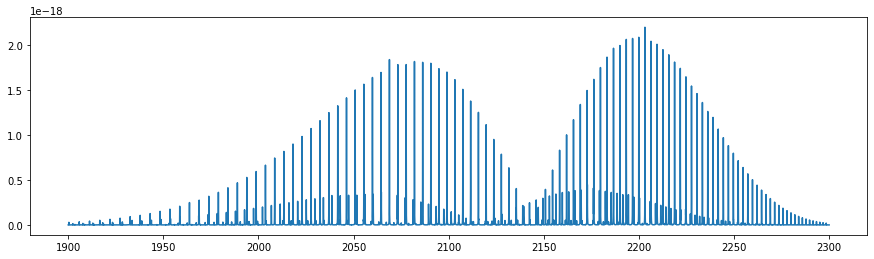

In [5]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,4))
plt.plot(nus,xsv)

This is a typical pattern of absorption for a diatomic molecule. These lines are gerenated by the so-called rotational-vibration transitions.
Recall the energy levels by a rigid rotation you learned at quantum physics! The selection rule allows $\Delta J = J_{upper} - J_{lower} \pm 1$. 
$\Delta J = 1$ is called the R-branch, while $\Delta J = -1$ is the P-branch. Let's check $\Delta J$ in mdb:


In [6]:
import matplotlib.pyplot as plt
jj = mdb.jupper - mdb.jlower

import numpy as np
print(np.unique(jj))

[-1  1]


Yes, we have the lines only with $\Delta J = \pm 1$. Let's plot them separately, using the masking. 

In [7]:
mask_R = jj == 1.0
numatrix = init_lpf(mdb.nu_lines[mask_R],nus)
xsv_R=xsvector(numatrix,sigmaD[mask_R],gammaL[mask_R],Sij[mask_R])

mask_P = jj == -1.0
numatrix = init_lpf(mdb.nu_lines[mask_P],nus)
xsv_P=xsvector(numatrix,sigmaD[mask_P],gammaL[mask_P],Sij[mask_P])

We can see that the left and right peaks correspond to the R- and P- branches, respectively!

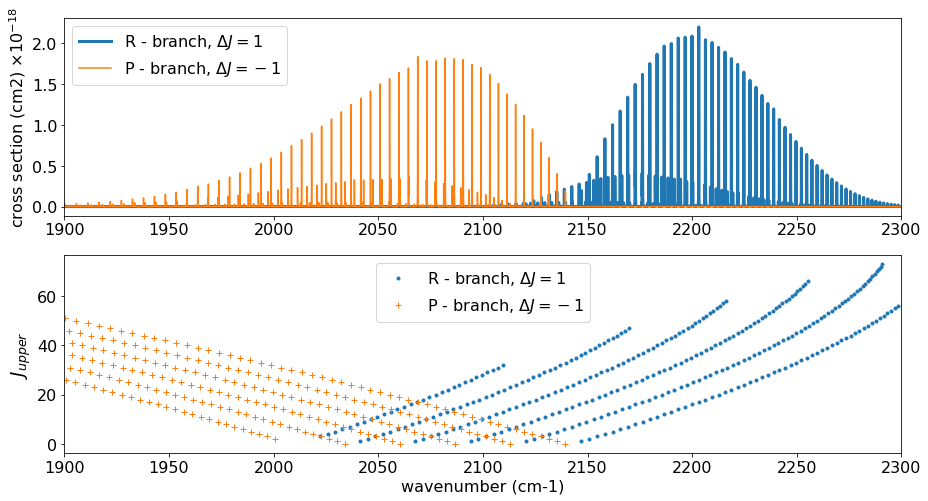

In [13]:
#c=["black","gray"]
c=["C0","C1"]
scale=10**-18
fig=plt.figure(figsize=(15,8))
ax = fig.add_subplot(211)
plt.plot(nus,xsv_R/scale,color=c[0],lw=3, label="R - branch, $\Delta J = 1$")
plt.plot(nus,xsv_P/scale,color=c[1], label="P - branch, $\Delta J = -1$")
plt.ylabel("cross section (cm2) $\\times 10^{-18}$",fontsize=16)
plt.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.xlim(nus[0],nus[-1])

ax = fig.add_subplot(212)
plt.plot(mdb.nu_lines[mask_R],mdb.jupper[mask_R],".",color=c[0], label="R - branch, $\Delta J = 1$")
plt.plot(mdb.nu_lines[mask_P],mdb.jupper[mask_P],"+",color=c[1], label="P - branch, $\Delta J = -1$")
plt.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.xlim(nus[0],nus[-1])
plt.xlabel("wavenumber (cm-1)",fontsize=16)
plt.ylabel("$J_{upper}$",fontsize=18)

#plt.savefig("rpbranch.png", bbox_inches="tight", pad_inches=0.0)
plt.show()

## CO band head in K-band

We are (?) exoplanet astronomers! Check the famous K-band CO bands!

In [14]:
nus,wave,resolution = wavenumber_grid(22900.0,23900.0,100000,unit="AA",xsmode="lpf")
mdb = MdbExomol("/home/kawahara/CO/12C-16O/Li2015",nurange=nus, crit=1.e-30,gpu_transfer=True)
print(len(mdb.nu_lines))

xsmode assumes ESLOG in wavenumber space: mode=lpf
Background atmosphere:  H2
Reading /home/kawahara/CO/12C-16O/Li2015/12C-16O__Li2015.trans.bz2
.broad is used.
Broadening code level= a0
default broadening parameters are used for  14  J lower states in  95  states
323


In [15]:
numatrix = init_lpf(mdb.nu_lines,nus) # initialization of LPF
qt=mdb.qr_interp(Tfix) # partition function ratio
Sij=SijT(Tfix,mdb.logsij0,mdb.nu_lines,mdb.elower,qt) # line strength
sigmaD=doppler_sigma(mdb.nu_lines,Tfix,Mmol) # Doppler width
gammaL = gamma_exomol(Pfix,Tfix,mdb.n_Texp,mdb.alpha_ref) + gamma_natural(mdb.A) # Lorentz width

In [16]:
jj = mdb.jupper - mdb.jlower
print(np.unique(jj))

[-1  1]


In [17]:
mask_R = jj == 1.0
numatrix = init_lpf(mdb.nu_lines[mask_R],nus)
xsv_R=xsvector(numatrix,sigmaD[mask_R],gammaL[mask_R],Sij[mask_R])

mask_P = jj == -1.0
numatrix = init_lpf(mdb.nu_lines[mask_P],nus)
xsv_P=xsvector(numatrix,sigmaD[mask_P],gammaL[mask_P],Sij[mask_P])


We can visualize how the bandhead would appear! 

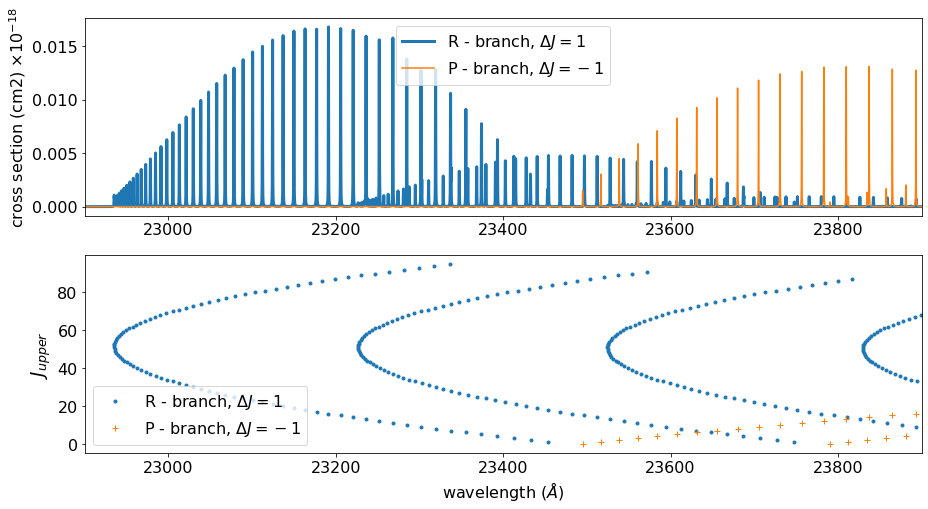

In [23]:
#c=["black","gray"]
c=["C0","C1"]
scale=10**-18
fig=plt.figure(figsize=(15,8))
ax = fig.add_subplot(211)
plt.plot(wave[::-1],xsv_R/scale,color=c[0],lw=3, label="R - branch, $\Delta J = 1$")
plt.plot(wave[::-1],xsv_P/scale,color=c[1], label="P - branch, $\Delta J = -1$")
plt.ylabel("cross section (cm2) $\\times 10^{-18}$",fontsize=16)
plt.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.xlim(wave[0],wave[-1])
ax = fig.add_subplot(212)
plt.plot(1.e8/mdb.nu_lines[mask_R],mdb.jupper[mask_R],".",color=c[0], label="R - branch, $\Delta J = 1$")
plt.plot(1.e8/mdb.nu_lines[mask_P],mdb.jupper[mask_P],"+",color=c[1], label="P - branch, $\Delta J = -1$")
plt.legend(fontsize=16)
plt.tick_params(labelsize=16)
plt.xlim(wave[0],wave[-1])
plt.xlabel("wavelength ($\\AA$)",fontsize=16)
plt.ylabel("$J_{upper}$",fontsize=18)
#plt.savefig("bandhead.png", bbox_inches="tight", pad_inches=0.0)
plt.show()